In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

***Задача 1***

О непрерывной равномерно распределенной случайной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Математическое ожидание и дисперсия равномерного распределения:

$$M(X) = \dfrac{a + b}{2}, \text{ } D(X) = \dfrac{(b - a)^2}{12}.$$

In [118]:
D = 0.2
a = 0.5


D = ((b-a)**2)/12

12*0.2 = (b - 0.5)**2

In [119]:
b = np.sqrt(2.4) + 0.5

In [120]:
M = (a + b)/2

In [121]:
print(f' Правая граница величины B - {b}, Среднее значение  - {M}')

 Правая граница величины B - 2.049193338482967, Среднее значение  - 1.2745966692414834


***Задача 2***

Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (numpy, scipy, pandas и пр.), а затем проверить себя с помощью встроенных функций



In [122]:
loc = 1.74
scale = 0.08

In [123]:
samples = np.random.normal(loc, scale, size=100000)

print(samples)

[1.83933533 1.74369004 1.77371692 ... 1.77558328 1.66786617 1.73322461]


In [124]:
def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

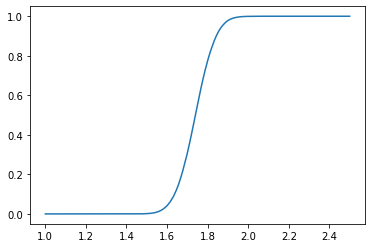

In [125]:
ox = np.linspace(1, 2.5, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

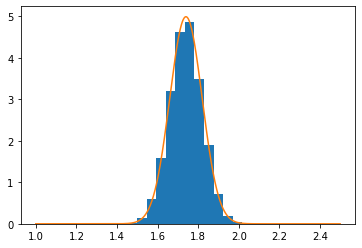

In [126]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

In [127]:
samples.mean()

1.73967748312939

In [128]:
samples.var()

0.006407695225784398

In [129]:
norm = stats.norm(loc, scale)

In [130]:
#1. больше 182 см

In [131]:
1 - norm.cdf(1.82)

0.15865525393145685

In [132]:
#2. больше 190 см

In [133]:
1 - norm.cdf(1.90)

0.02275013194817932

In [134]:
#3. от 166 см до 190 см

In [135]:
norm.cdf(1.90) - norm.cdf(1.66)

0.8185946141203638

In [136]:
#4. от 166 см до 182 см

In [138]:
norm.cdf(1.82) - norm.cdf(1.66)

0.6826894921370863

In [139]:
#5. от 158 см до 190 см

In [140]:
norm.cdf(1.90) - norm.cdf(1.58)

0.9544997361036414

In [141]:
#6. не выше 150 см или не ниже 190 см

In [142]:
norm.cdf(1.50) + (1 - norm.cdf(1.90))

0.024100029979809413

In [143]:
#7. не выше 150 см или не ниже 198 см


In [144]:
norm.cdf(1.50)+ (1 - norm.cdf(1.98))

0.0026997960632601965

In [145]:
#8. ниже 166 см

In [146]:
norm.cdf(1.66)

0.15865525393145685

In [147]:
stats.norm.cdf(1.66,1.74,0.08)

0.15865525393145685

***Задача 3 (Дополнительно)***

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [148]:
scale=np.arange(0.01,1.00,0.0001)


In [149]:
# среднее квадратическое отклонение массы коробки
for i in scale:
    p = stats.norm.cdf(x=1, loc=1.06, scale=i)
    if p >= 0.0499 and p <= 0.0502:
        print(i)

0.03649999999999984


In [150]:
# б) процент коробок, имеющих массу больше 1.1 кг
1 - stats.norm.cdf(x=1.1, loc=1.06, scale=0.03649)

0.1364976561876875